In [6]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sentence_transformers import SentenceTransformer

C:\Users\Satriock\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
df_titles = pd.read_csv(r"./../../data/raw/JPTIIK_unlabeled.csv")

In [8]:
df_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1625 entries, 0 to 1624
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   article  1625 non-null   object
dtypes: object(1)
memory usage: 12.8+ KB


In [9]:
df_titles.head()

,article
0,Sistem Pengaman Kendaraan Roda Dua dengan Peng...
1,Implementasi Sistem Pendukung Keputusan untuk ...
2,Pengembangan Database E-Learning PT XYZ menggu...
3,Mekanisme Penyediaan Layanan pada Perangkat Sm...
4,Pengendalian Suhu dan Kelembapan Udara untuk B...


In [10]:
df_titles.describe()

,article
count,1625
unique,1625
top,Sistem Pengaman Kendaraan Roda Dua dengan Peng...
freq,1


In [13]:
df_titles["word_count"] = df_titles["article"].apply(lambda x: len(str(x).split()))

print(df_titles.head())

                                             article  word_count
0  Sistem Pengaman Kendaraan Roda Dua dengan Peng...          12
1  Implementasi Sistem Pendukung Keputusan untuk ...          20
2  Pengembangan Database E-Learning PT XYZ menggu...          12
3  Mekanisme Penyediaan Layanan pada Perangkat Sm...          15
4  Pengendalian Suhu dan Kelembapan Udara untuk B...          15


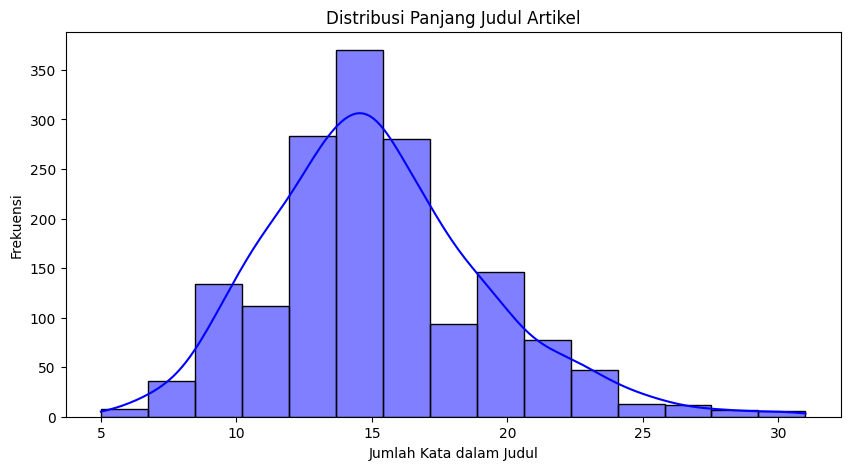

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(df_titles["word_count"], bins=15, kde=True, color="blue")
plt.xlabel("Jumlah Kata dalam Judul")
plt.ylabel("Frekuensi")
plt.title("Distribusi Panjang Judul Artikel")
plt.show()

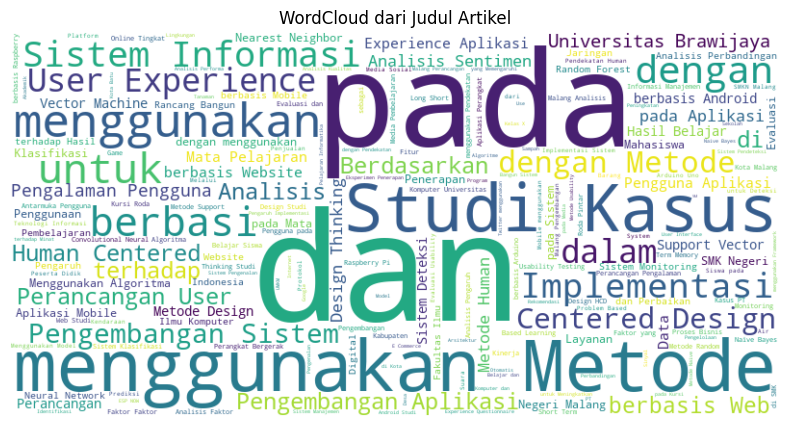

In [15]:
text = " ".join(df_titles["article"])

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud dari Judul Artikel")
plt.show()

In [16]:
vectorizer = TfidfVectorizer(max_features=500)

tfidf_matrix = vectorizer.fit_transform(df_titles["article"])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

print(tfidf_df.head())

    19  acceptance  access   ad  addie  administrasi  air  akademik  \
0  0.0         0.0     0.0  0.0    0.0           0.0  0.0       0.0   
1  0.0         0.0     0.0  0.0    0.0           0.0  0.0       0.0   
2  0.0         0.0     0.0  0.0    0.0           0.0  0.0       0.0   
3  0.0         0.0     0.0  0.0    0.0           0.0  0.0       0.0   
4  0.0         0.0     0.0  0.0    0.0           0.0  0.0       0.0   

   aktivitas   al  ...  web  webqual  website  weighted  wireless  wisata  \
0        0.0  0.0  ...  0.0      0.0      0.0       0.0       0.0     0.0   
1        0.0  0.0  ...  0.0      0.0      0.0       0.0       0.0     0.0   
2        0.0  0.0  ...  0.0      0.0      0.0       0.0       0.0     0.0   
3        0.0  0.0  ...  0.0      0.0      0.0       0.0       0.0     0.0   
4        0.0  0.0  ...  0.0      0.0      0.0       0.0       0.0     0.0   

    xi      xyz  yang  yolov8  
0  0.0  0.00000   0.0     0.0  
1  0.0  0.00000   0.0     0.0  
2  0.0  0.3349

In [17]:
model = SentenceTransformer("all-MiniLM-L6-v2")

bert_embeddings = model.encode(df_titles["article"].tolist())

bert_df = pd.DataFrame(np.array(bert_embeddings))

print(bert_df.head())

C:\Users\Satriock\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Satriock\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


        0         1         2         3         4         5         6    \
0  0.030265 -0.006904 -0.017769 -0.025327 -0.003753  0.036175  0.012345   
1 -0.040114  0.079489 -0.057437 -0.060013 -0.055234 -0.018373 -0.016583   
2  0.017494 -0.032975 -0.070121  0.005100 -0.006352 -0.064547 -0.011061   
3  0.011648  0.030638  0.073029 -0.011198 -0.030744 -0.042730 -0.034076   
4 -0.011512 -0.011055 -0.039273  0.011954 -0.022242  0.022825  0.030584   

        7         8         9    ...       374       375       376       377  \
0  0.017124  0.006126  0.021413  ...  0.022158 -0.043428  0.025486  0.033983   
1  0.048385 -0.017993  0.058612  ...  0.026827  0.010300  0.044289 -0.050342   
2  0.035433 -0.046404  0.066779  ...  0.069023 -0.024566  0.018487 -0.002560   
3 -0.020438 -0.021516  0.007675  ...  0.076014 -0.015924  0.028823 -0.004197   
4  0.063971 -0.063711 -0.016574  ... -0.043701 -0.029672  0.023384 -0.019190   

        378       379       380       381       382       383  
0 -0